# Feature Engineering  
*Student Name: Luyu Feng,   Student ID: 22202363*

# Task 1  
## 1. Load the dataset into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read raw data to DateFrame

file = pd.read_csv('metro_traffic_15_19.csv',index_col = None)
traffic  = pd.DataFrame(file)
traffic.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936


In [2]:
# handle datetime format

import datetime

traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['weekday'] = traffic['date_time'].dt.dayofweek
traffic['date'] = traffic['date_time'].dt.date

traffic.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,weekday,date
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,2015-07-01
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,2015-07-01
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2015-07-01
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,2,2015-07-01
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,2,2015-07-01


## 2. Produce some plots to show the periodicity  
- weekly periodicity
- daily periodicity

### (1) Firstly observe the recent 2-month traffic volume by day

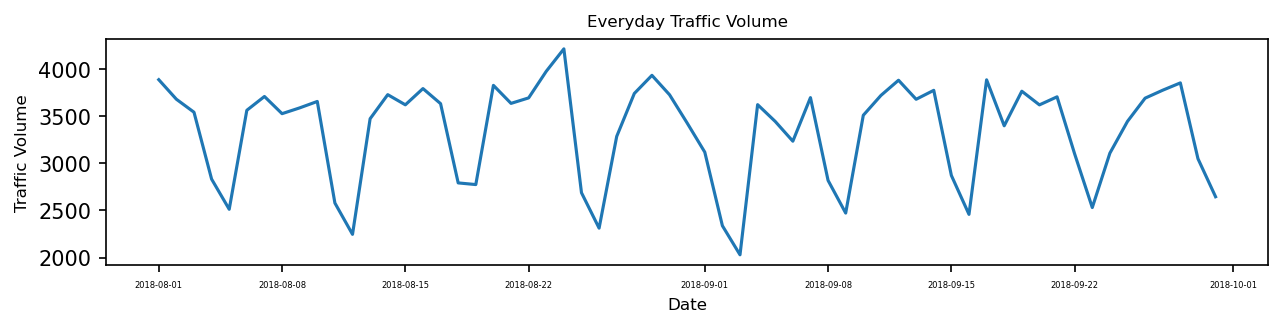

In [3]:
# get everyday's traffic volumn and plot

traffic_day = traffic.loc[:,['date','traffic_volume']].groupby(['date']).mean()

plt.figure( figsize=(10,2), dpi = 150)
plt.plot(traffic_day.loc[traffic_day.index > datetime.date(2018,7,31)])#only select recent 2 months for displaying
plt.xticks(fontsize = 4)
plt.title("Everyday Traffic Volume", fontsize = 8) 
plt.xlabel ("Date" , fontsize = 8) 
plt.ylabel ("Traffic Volume", fontsize = 8) 
plt.show()

From the recent 2 months' traffic volume:   
  
It looks like ECG plot, there are a continuous traffic peak for 5 days and a sudden trough for 2 days.  
**And every 7 days, it repeats as a loop, So we guess there might a periodicity in each week**  

### (2) Explore the periodicity of traffic volume during week

In [4]:
# get every weekday's traffic volumn in each year

year = [2015, 2016, 2017, 2018]
weekofday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

traffic_week = pd.DataFrame(index = weekofday, columns = year )

for i in weekofday: 
    for j in year:        
        traffic_week.loc[i,j] = traffic['traffic_volume'].loc[(traffic['weekday'] == weekofday.index(i)) & (traffic['date_time'].dt.year == j)].mean()

traffic_week

,2015,2016,2017,2018
Monday,3377.994881,3236.96018,3360.576828,3199.741277
Tuesday,3560.787456,3411.231461,3467.612946,3523.470539
Wednesday,3586.588745,3473.320475,3615.758306,3585.752059
Thursday,3636.914616,3536.716602,3694.498989,3672.065753
Friday,3508.185115,3543.718843,3789.123324,3719.48018
Saturday,2498.910233,2671.086656,2926.795165,2778.676724
Sunday,2359.519573,2312.504833,2512.664411,2355.650765


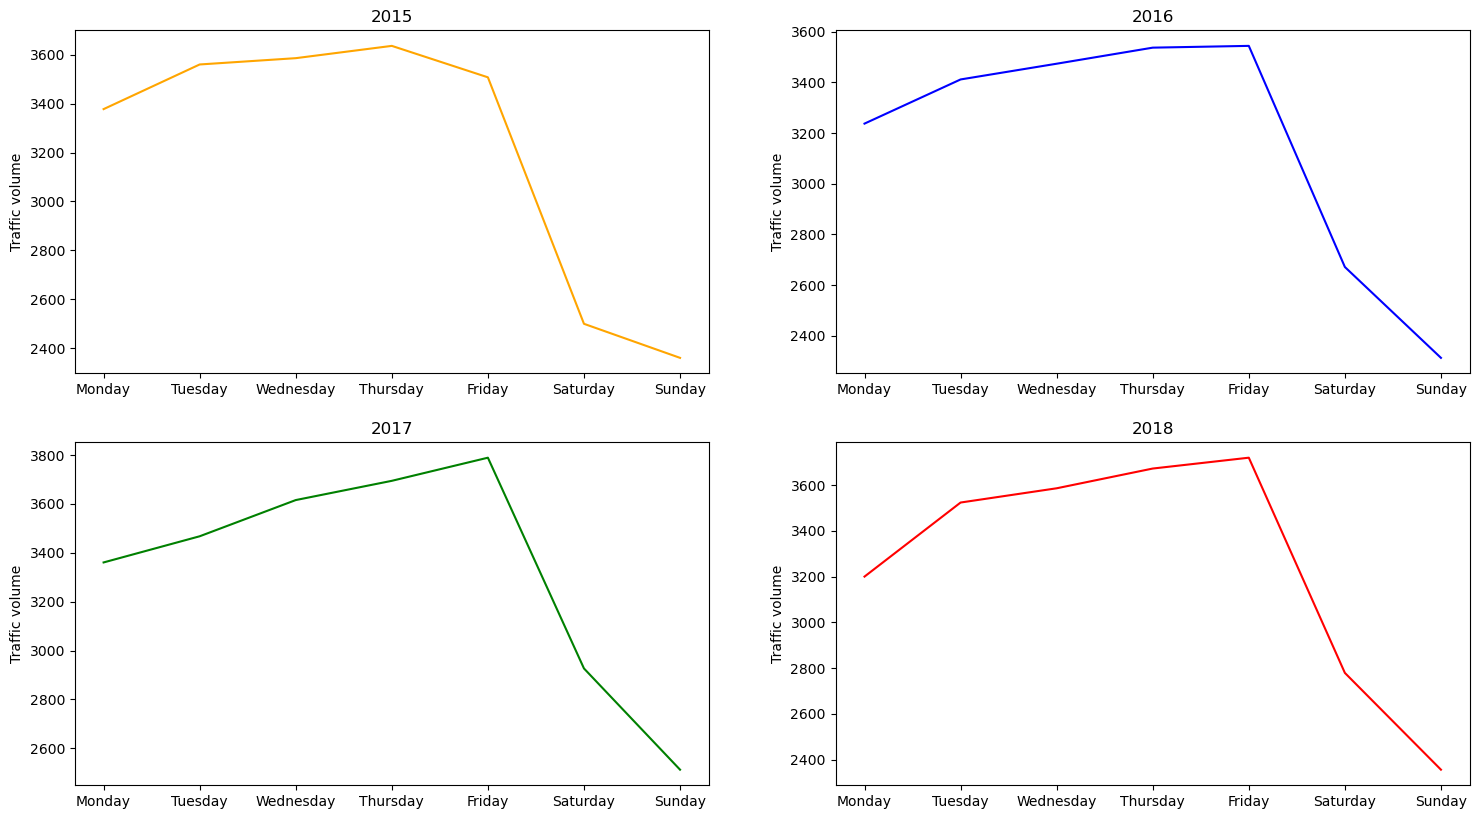

In [5]:
#make plots

colors = ['orange','blue','green','red']
index = 0
figure = plt.figure(figsize=(18,10),dpi = 100)
for index_name in list(traffic_week):
    axc = figure.add_subplot(2,2,index+1)
    axc.plot(traffic_week[index_name],color = colors[index])
    axc.set_xticks(weekofday)
    axc.set_title(index_name)
    axc.set_ylabel("Traffic volume")
    index = index + 1

From the each weekday's traffic volume in 4 years:  
  
The weekly traffic volume has obvious periodicity.  
Every Monday to Friday, the daily traffic volume increases slightly;   
Every Friday to Sunday, the traffic volume will quickly drop from 3000+ to 2000+.

### (3) Explore the periodicity of traffic volume during one day

In [6]:
# get everyhour's traffic volumn in each weekday

traffic_hour = pd.DataFrame(columns = weekofday)

for i in range(24): 
    for j in weekofday:
        traffic_hour.loc[i,j] = traffic['traffic_volume'].loc[(traffic['date_time'].dt.hour==i) & (traffic['weekday']==weekofday.index(j))].mean()

traffic_hour.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,633.140704,602.676056,617.359606,697.299492,771.368984,1275.708995,1408.378947
1,398.201058,368.270936,393.98995,399.05641,465.027174,777.430693,866.685279
2,302.459184,274.653061,307.60101,299.885,347.880435,608.032432,636.726316
3,348.265625,350.990196,373.527919,367.695431,387.180412,420.151832,386.357895
4,815.854922,871.154589,897.454976,884.519417,829.307692,430.8,351.167488


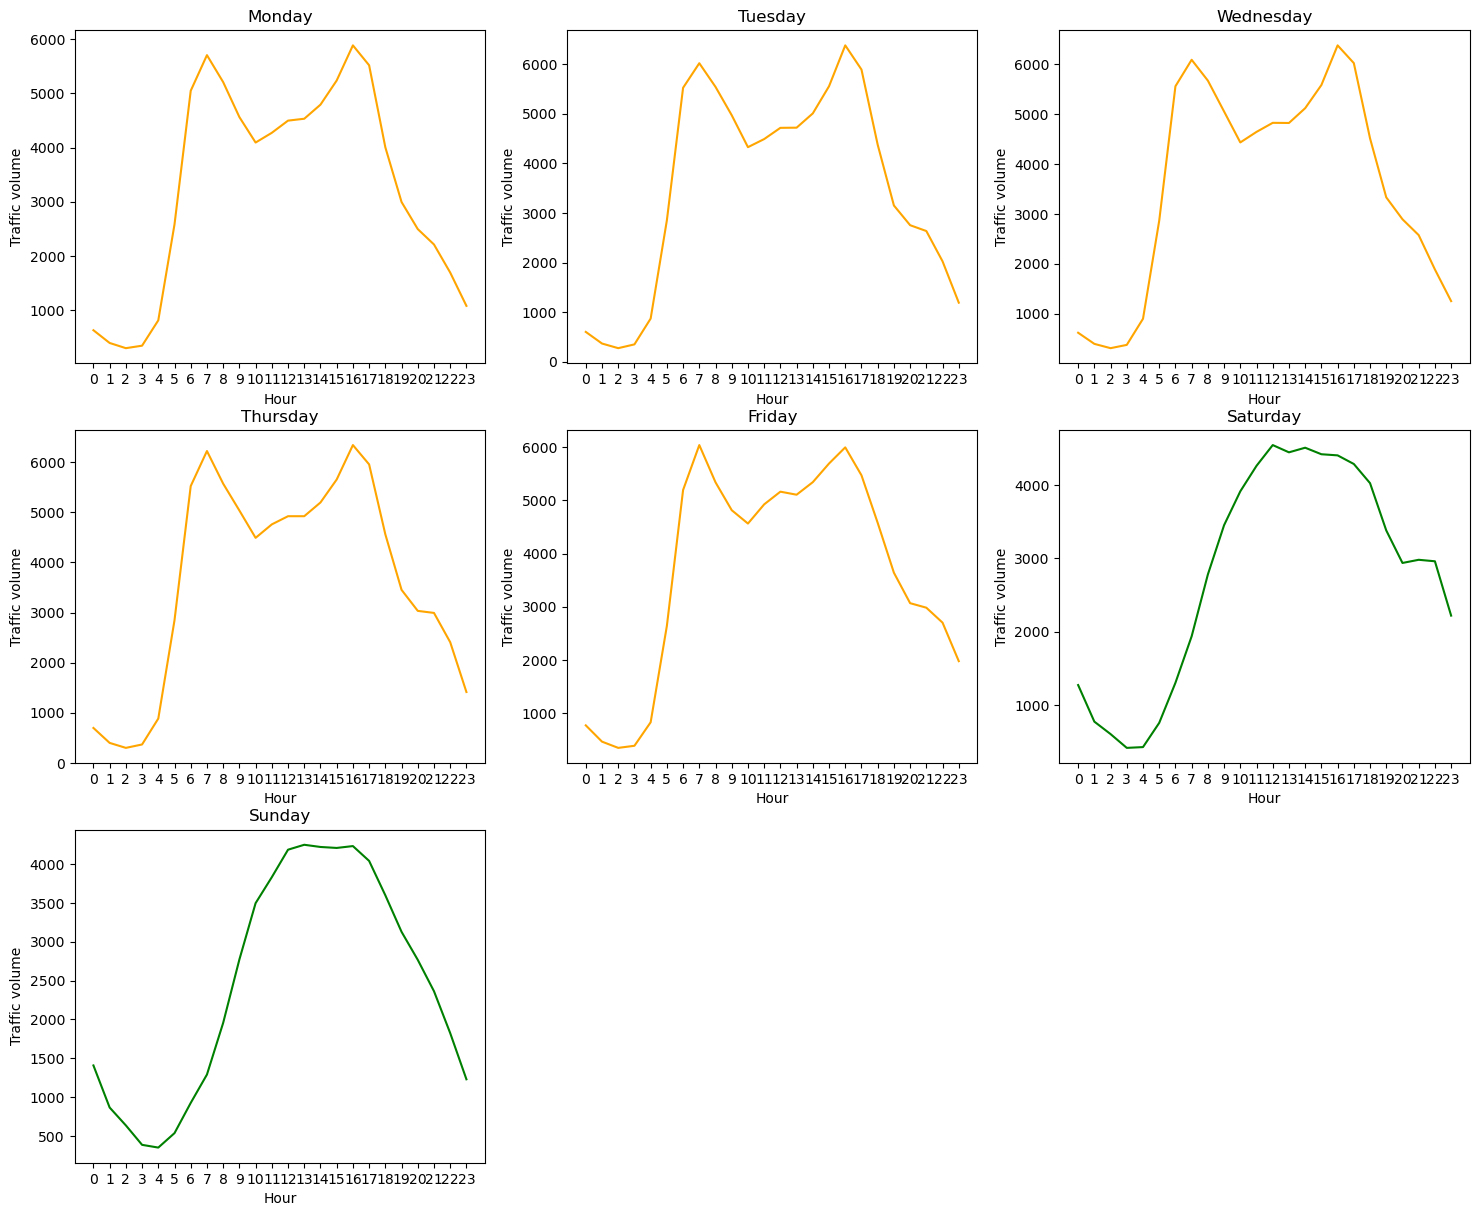

In [7]:
# make plots
colors = ['orange','orange','orange','orange','orange','green','green']
index = 0
figure = plt.figure(figsize=(18,15),dpi = 100)
for index_name in list(traffic_hour):
    axc = figure.add_subplot(3,3,index+1)
    axc.plot(traffic_hour[index_name],color = colors[index])
    axc.set_xticks(list(range(0,24)))
    axc.set_title(index_name)
    axc.set_xlabel("Hour")
    axc.set_ylabel("Traffic volume")
    index = index + 1

From each hour's traffic volume in everyday:  
  
· Everyday from Monday to Friday, there are two traffic peaks at 7:00 and 16:00 with around 6000 traffic volume per hour;   
· Everyday On weekends, there is only one traffic peak every day between 12:00 and 17:00, and the traffic volume per hour is only 4000+.

In addition, I also tried to look at the traffic_volume periodic trends in yearly, monthly, and quarterly. However, they are not as obvious as the weekly and daily periodicity, so I only select the weekly and daily traffic volume periodicity to display.

# Task 2  
## 1. Extract time features from the date_time

In [8]:
data = traffic
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour

dataset = data.drop(columns =['date_time','date','weekday'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32047 entries, 0 to 32046
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rain_1h         32047 non-null  float64
 1   snow_1h         32047 non-null  float64
 2   temp            32047 non-null  float64
 3   clouds_all      32047 non-null  int64  
 4   traffic_volume  32047 non-null  int64  
 5   month           32047 non-null  int64  
 6   day             32047 non-null  int64  
 7   hour            32047 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.0 MB


In [9]:
dataset.head()

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,month,day,hour
0,0.0,0.0,289.20,1,737,7,1,0
1,0.0,0.0,289.40,1,444,7,1,1
2,0.0,0.0,289.19,1,347,7,1,2
3,0.3,0.0,288.74,1,356,7,1,3
4,0.0,0.0,288.07,1,936,7,1,4


## 2. Split data into train and test sets

In [10]:
y = dataset.pop('traffic_volume').values
X = dataset.values
X.shape

(32047, 7)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# standarlize data
X_scal = StandardScaler().fit_transform(X)

# set random_state for comparing with follow-up analysis
X_train, X_test, y_train, y_test = train_test_split(X_scal,y,random_state = 42,test_size = 0.33)

## 3. Try 2 regression modules
### (1) Linear regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE

reg = LinearRegression().fit(X_train, y_train)

In [13]:
# Evaluate the linear regression module

def evaluation(module,X_train, y_train, X_test, y_test):
    print('R squared: {:.2f}'.format(module.score(X_train, y_train)))
    print('MAE: {:.2f}'.format(mean_absolute_error(y_test, module.predict(X_test))))
    print('MAPE: {:.2f}'.format(MAPE(y_test, module.predict(X_test))))

evaluation(reg,X_train, y_train, X_test, y_test)

R squared: 0.14
MAE: 1610.89
MAPE: 2.41


### (2) SGDRegressor
In the lecture, we learned one other regression model named SGDRegressor, which may be suitable for multiple Linear Regression. As a result, the evaluation result is not better than Linear regression.

In [14]:
from sklearn.linear_model import SGDRegressor

#before this I tried max_iter values range from 1 to 10, and finally choose 1
sgd = SGDRegressor(max_iter=1).fit(X_train, y_train)

evaluation(sgd,X_train, y_train, X_test, y_test)

R squared: -0.42
MAE: 1614.87
MAPE: 2.47


/Users/fengluyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


As a result, the evaluation result is not better than Linear regression.  
Then we try to optimize the data to get better result in Task 3.

# Task 3  
## Encoding Cyclical Features
For this question, I searched 'Cyclical Features' on Google, and learned from the resource below.   
After encode thhe cyclical features, the test results have been greatly improved.  
reference : https://www.avanwyk.com/encoding-cyclical-features-for-deep-learning/

In [15]:
# Clear redundant information

data = traffic.drop(columns = ['weekday','date','month','day','hour'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32047 entries, 0 to 32046
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       32047 non-null  datetime64[ns]
 1   rain_1h         32047 non-null  float64       
 2   snow_1h         32047 non-null  float64       
 3   temp            32047 non-null  float64       
 4   clouds_all      32047 non-null  int64         
 5   traffic_volume  32047 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.5 MB


In [16]:
# encode date as cyclical features

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.date_time.dt.month
data = encode(data, 'month', 12)

data['day'] = data.date_time.dt.day
data = encode(data, 'day', 31)

data['hour'] = data.date_time.dt.hour
data = encode(data, 'hour', 24)

data.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,month,month_sin,month_cos,day,day_sin,day_cos,hour,hour_sin,hour_cos
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,7,-0.5,-0.866025,1,0.201299,0.97953,0,0.000000,1.000000
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,7,-0.5,-0.866025,1,0.201299,0.97953,1,0.258819,0.965926
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,7,-0.5,-0.866025,1,0.201299,0.97953,2,0.500000,0.866025
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,7,-0.5,-0.866025,1,0.201299,0.97953,3,0.707107,0.707107
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,7,-0.5,-0.866025,1,0.201299,0.97953,4,0.866025,0.500000


In [17]:
# Get the label and features separately
data_cyc = data.drop(columns = ['date_time','month','day','hour'])
y = data_cyc.pop('traffic_volume').values
X = data_cyc.values

# Standardlize the feature value
X_scal = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scal,y,random_state = 42,test_size = 0.33)

In [18]:
reg_cyc = LinearRegression().fit(X_train, y_train)

evaluation(reg_cyc,X_train, y_train, X_test, y_test)

R squared: 0.64
MAE: 890.45
MAPE: 1.57


Compared with the test results of in Task2, the test results after periodic encoding of time features have been greatly improved.

# Task 4   
Use f_regression to make feature selection  
### (1) Calculate F-value between label/feature  
The F-value between label/feature is displayed below:  
hour_cos, hour_sin, temp, clouds_all have the highest f_regression scores, other features has little f_regression score.

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(X_train, y_train)
X_train_fs = f_selector.transform(X_train)
X_test_fs = f_selector.transform(X_test)

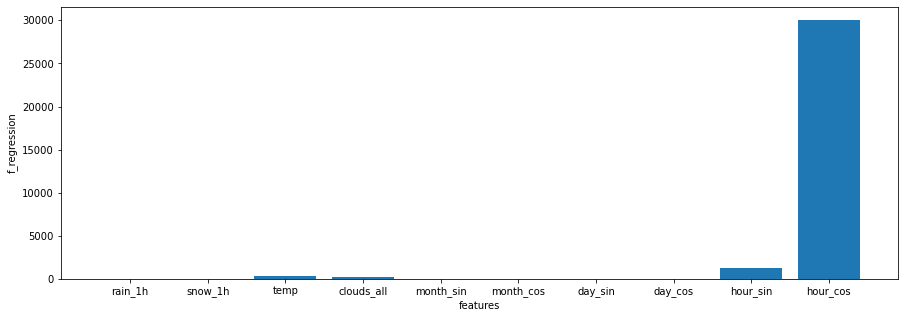

In [20]:
# plot feature f_regression scores
plt.figure(figsize=(15, 5))
plt.bar(list(data_cyc.columns), f_selector.scores_)

plt.xlabel("features") 
plt.ylabel("f_regression") 
plt.show()

In [21]:
df = pd.DataFrame()
df.index = list(data_cyc.columns)
df['f_regression'] = list(f_selector.scores_)
df.sort_values(by=['f_regression'],ascending=False,inplace=True)
df

,f_regression
hour_cos,30040.325351
hour_sin,1304.463640
temp,311.817435
clouds_all,191.608273
month_cos,28.460267
day_cos,4.867506
month_sin,1.767697
rain_1h,1.224767
snow_1h,0.051782
day_sin,0.026128


### (2) Compare the mape values from highest scoring feature to all features
If we use MAPE to evaluate the accuracy of module learning:  
- When only select top 2 features['hour_cos','hour_sin'], it get the lowest MAPE value;
- After selecting top 4 features, the MAPE value keeps on 1.56, which might mean that the features after are of no use for the module learning

In [22]:
# compare the mape values for each feature

mape_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(score_func = f_regression, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    reg_k = LinearRegression().fit(X_tR_new, y_train)
    y_dash = reg_k.predict(X_tS_new)
    mape = MAPE(y_test, y_dash)
    mape_scores.append(mape)
    
df['MAPE'] = mape_scores

df

,f_regression,MAPE
hour_cos,30040.325351,1.790735
hour_sin,1304.463640,1.554621
temp,311.817435,1.574131
clouds_all,191.608273,1.568341
month_cos,28.460267,1.567249
day_cos,4.867506,1.567771
month_sin,1.767697,1.566748
rain_1h,1.224767,1.566768
snow_1h,0.051782,1.566802
day_sin,0.026128,1.566530


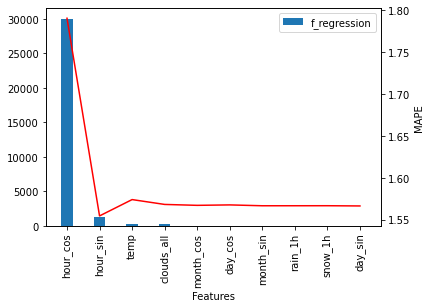

In [23]:
# plot the changing trend

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["f_regression"], label='f_regression',width=.35)
ax2.plot(df.index, df["MAPE"], color='red', label='MAPE')
ax.set_xticks(list(df.index))
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax2.set_ylabel('MAPE')
ax.legend()

plt.show()

I would like to choose [ hour_cos, hour_sin, temp, clouds_all ] as the effective feature subset for this prediction task